In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import os
# os.chdir("D:/NUS/")
#os.getcwd()

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

import nltk
#nltk.download('stopwords')

from textblob import TextBlob
import seaborn as sns
from afinn import Afinn

In [106]:
data = pd.read_csv("./Output/data_clean&processed.csv")
data = data.drop(data.columns[0],axis=1)
data.sample(3)

,id_row,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,location_name,month_launched,year_launched,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments
3022,3030,249,An illustrated book of children's poetry with ...,"{'id': 46, 'name': ""Children's Books"", 'slug':...",8535,US,2015-11-24 17:52:17,USD,2016-01-12 20:40:06,1.000000,2000,514099744,2015-12-13 20:40:06,"{""id"":2352824,""name"":""Albuquerque"",""slug"":""alb...",The Tiniest Vampire (and other silly things),8535.0,"{""id"":2246225,""project_id"":2246225,""state"":""ac...",the-tiniest-vampire-and-other-silly-things,https://www.kickstarter.com/discover/categorie...,True,True,1,2016-01-12 20:40:07,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",8535.000000,domestic,,NaN,0,,0.0,30,Publishing,Children's Books,Albuquerque,12,2015,1.138128,-0.402912,0.687196,-0.023896,-0.331095,0,34.277108,0.0,An illustrated book of children's poetry with ...,NaN
3147,3156,2,"Catnip leaves & bud, soaked in it's stalk oil ...","{'id': 310, 'name': ""Farmer's Markets"", 'slug'...",18,CA,2014-08-09 02:37:50,USD,2014-09-08 10:51:55,0.787634,40,768639530,2014-08-09 10:51:55,"{""id"":9889,""name"":""Penticton"",""slug"":""penticto...",Catnip of the Potent Kind,20.0,"{""id"":1275175,""project_id"":1275175,""state"":""in...",catnip-of-the-potent-kind,https://www.kickstarter.com/discover/categorie...,False,False,0,2014-09-08 10:51:55,0.914098,"{""web"":{""project"":""https://www.kickstarter.com...",18.281953,international,,NaN,0,,0.0,30,Food,Farmer's Markets,Penticton,8,2014,-1.172744,-2.515457,-1.176929,-0.023896,-0.331095,0,10.000000,0.0,"Catnip leaves & bud, soaked in it's stalk oil ...",NaN
915,915,22,Enhance The Herald's commencement mag with hig...,"{'id': 13, 'name': 'Journalism', 'slug': 'jour...",657,US,2012-03-24 17:57:12,USD,2012-05-02 18:25:49,1.000000,450,1179019233,2012-04-17 18:25:49,"{""id"":2477058,""name"":""Providence"",""slug"":""prov...",FULL GLOSSY 2012,657.0,"{""id"":116261,""project_id"":116261,""state"":""inac...",full-glossy-2012,https://www.kickstarter.com/discover/categorie...,True,False,1,2012-05-02 18:25:49,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",657.000000,domestic,We have a huge library of licensed and careful...,"["" What does Antstream mean? We’re not at libe...",16,No comments yet.,0.0,15,No Parent Category,Journalism,Providence,4,2012,-0.108504,-1.212504,-0.108050,-1.795298,-0.331095,1,29.863636,-1.0,Enhance The Herald's commencement mag with hig...,"["" What does Antstream mean? We’re not at libe..."


In [107]:
data.isna().sum()

id_row                         0
backers_count                  0
blurb                          0
category                       0
converted_pledged_amount       0
country                        0
created_at                     0
current_currency               0
deadline                       0
fx_rate                        0
goal                           0
id                             0
launched_at                    0
location                       5
name                           0
pledged                        0
profile                        0
slug                           0
source_url                     0
spotlight                      0
staff_pick                     0
state                          0
state_changed_at               0
static_usd_rate                0
urls                           0
usd_pledged                    0
usd_type                       0
story                          0
faq                         2419
num_faq                        0
comments  

In [108]:
#fill na with na
data = data.fillna("na")

## Create a dataset for text and sentiment analysis

In [109]:
data_text = data[["blurb_name","comments","story","faq","state", "faq_comments", "blurb", "name"]]
data_text.sample(5)

,blurb_name,comments,story,faq,state,faq_comments,blurb,name
771,DECMBR is an action packed thriller movie that...,Immentale\nabout 5 years ago\nHappy Birthday :...,"Three hundred years ago, a Bristol man called ...","["" How many stories will the book have? Our cu...",0,"["" How many stories will the book have? Our cu...",DECMBR is an action packed thriller movie that...,DECMBR - An Action Movie Production
1970,Utvalda eSportanpassade snacks & merchandise s...,,,na,1,na,Utvalda eSportanpassade snacks & merchandise s...,GGBOX - eSport Prenumerationsbox
1751,In 1998 the Russian Mafia intercepted a fleein...,,,na,1,na,In 1998 the Russian Mafia intercepted a fleein...,Money To My Friends | A Crime-Thriller short film
113,This project is created to allow lovers of thi...,No comments yet.,,[' '],1,[' ']No comments yet.,This project is created to allow lovers of thi...,CYBORGS REWARDS
1544,Send a card to say thank you to the people who...,,,na,1,na,Send a card to say thank you to the people who...,Say Thank You to Your Everyday Heroes


In [110]:
data_text.isna().sum()

blurb_name      0
comments        0
story           0
faq             0
state           0
faq_comments    0
blurb           0
name            0
dtype: int64

### Exploring text cols

In [111]:
data_text["faq"][39]

"['   ']"

In [112]:
data_text["blurb"][39]

'Over 90 levels to explore on your NES. Soundtrack now available on vinyl!'

In [113]:
data_text["name"][39]

"Alfonzo's Arctic Adventure - A new game for the NES"

In [114]:
data_text["story"][39]

'I\'m tired of woman being overlooked and considered "over the hill\' if their age is over a certain number. Let\'s be out and be proud of our beauty, whatever age we are. If Hollywood can say a men in his 50\'s can be a leading man and "most eligible bachelor", then a "knockout" woman over fifty should have her day. I propose a one woman photographic show of our "American" beauties called, "Beauty at ANY AGE." Come be a part of the movement. Let your inner and outer beauty shine.'

In [115]:
data_text["comments"][39]

'No comments yet.'

In [116]:
#See why with comments got higher failed

sample = data_text.loc[(data_text["comments"] != "No comments yet.") & (data_text["state"] == 0)]

In [117]:
sample = data.loc[(data["n_comments"] > 0) & (data["state"] == 1)]

In [118]:
len(sample)

315

In [119]:
pd.set_option('display.max_colwidth', 500)

In [120]:
sample

,id_row,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,location_name,month_launched,year_launched,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments
10,10,94,"A campaign to support the artists creating Theatre Forever's The Nature Crown, premiering in the Guthrie Theater's Dowling Studio!","{'id': 285, 'name': 'Plays', 'slug': 'theater/plays', 'position': 6, 'parent_id': 17, 'parent_name': 'Theater', 'color': 16743775, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/theater/plays'}}}",6000,US,2015-02-18 16:39:27,USD,2015-03-27 11:24:52,1.000000,6000,906477612,2015-02-25 11:24:52,"{""id"":2452078,""name"":""Minneapolis"",""slug"":""minneapolis-mn"",""short_name"":""Minneapolis, MN"",""displayable_name"":""Minneapolis, MN"",""localized_name"":""Minneapolis"",""country"":""US"",""state"":""MN"",""type"":""Town"",""is_root"":false,""expanded_country"":""United States"",""urls"":{""web"":{""discover"":""https://www.kickstarter.com/discover/places/minneapolis-mn"",""location"":""https://www.kickstarter.com/locations/minneapolis-mn""},""api"":{""nearby_projects"":""https://api.kickstarter.com/v1/discover?signature=1613092880.4f38...",Theatre Forever's The Nature Crown,6000.00,"{""id"":1714931,""project_id"":1714931,""state"":""inactive"",""state_changed_at"":1425915894,""name"":null,""blurb"":null,""background_color"":null,""text_color"":null,""link_background_color"":null,""link_text_color"":null,""link_text"":null,""link_url"":null,""show_feature_image"":false,""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""feature_image_attributes"":{""image_urls"":{""default"":""https://ksr-ugc.imgix.net/assets/012/041/750/d2985239a7d5af0c0aa80e9daa755720_original.jpeg?ixlib=rb-2.1.0&c...",theatre-forevers-the-nature-crown,https://www.kickstarter.com/discover/categories/theater/plays,True,False,1,2015-03-27 11:24:55,1.000000,"{""web"":{""project"":""https://www.kickstarter.com/projects/101899938/theatre-forevers-the-nature-crown?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/101899938/theatre-forevers-the-nature-crown/rewards""}}",6000.000000,domestic,"At Ormiston Primary School we are looking at creating a community garden to bring the local community into our school to share in the learning. Our aim is to provide a safe environment where students and families can learn about growing, waste management and healthy eating. This will help create a happy healthy life. \nOur garden will be used for class and school growing. Provide lessons on growing, composting and soil management. We will provide plots for families to work in and hopefully r...",[' '],0,"Rob ColatuttoCreatorSuperbacker\n5 months ago\n@MentatYP: I did mark the one used in the campaign as private since it had a couple errors.\nThe updated video on the installation guide webpage here: https://geodegaming.com/pages/jasper-compatible-dovetail-mount-installation is fully updated for the Cup Holder Mounts\nFor a side shelf, that webpage above also has very detailed step by step instructions under the video to go over some of the finer details with making sure you get a great alignm...",102.0,30,Theater,Plays,Minneapolis,2,2015,0.632580,0.193864,0.577857,-0.023896,4.737061,0,63.829787,100.0,"A campaign to support the artists creating Theatre Forever's The Nature Crown, premiering in the Guthrie Theater's Dowling Studio!Theatre Forever's The Nature Crown","[' ']Rob ColatuttoCreatorSuperbacker\n5 months ago\n@MentatYP: I did mark the one used in the campaign as private since it had a couple errors.\nThe updated video on the inst

In [121]:
sample["comments"].sample(10)

647                                                                                                                                                                                                                                                                                                                                                                                                                                                               This person has canceled their pledge. Show the comment.
689                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Big Bri, the KS GuySuperbacker\n4 month

# Part 1: Text Analysis on Story

In [122]:
# define X and y
X = data_text.story 
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("test target distribution")
print(y_test.shape)
print(y_test.value_counts())

print("\ntrain target distribution")
print(y_train.shape)
print(y_train.value_counts())

test target distribution
(855,)
1    541
0    314
Name: state, dtype: int64

train target distribution
(2564,)
1    1612
0     952
Name: state, dtype: int64


In [123]:
#Get null accuracy

y_test.value_counts().head(1) / y_test.shape

1    0.632749
Name: state, dtype: float64

In [124]:
# define a function that accepts a vectorizer and calculates the accuracy

def tokenize_test(X_train, y_train, X_test, y_test, vect, model=MultinomialNB()):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # fit model to predict the star rating
    model.fit(X_train_dtm, y_train)
    y_pred_class = model.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, model.predict(X_train_dtm)))
    
    # print the accuracy of its predictions
    print('Validation Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

## Model 1: Use CountVect & NB as model

In [125]:
#use default params
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  8946
Training Accuracy:  0.6376755070202809
Validation Accuracy:  0.6011695906432749


In [126]:
# Tuninng params 1

vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.6326053042121685
Validation Accuracy:  0.5906432748538012


In [127]:
# Tuninng params 2 (use this)

vect = CountVectorizer(ngram_range=(1, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  8000
Training Accuracy:  0.6302652106084243
Validation Accuracy:  0.5906432748538012


In [128]:
#Get most predictable word for each class
vect = CountVectorizer(ngram_range=(1, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

#Check num of features
len(fail_token_ratio)

8000

In [129]:
print("Top Tokens that leads to failure")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to failure


,token,ratio
5911,regulations,1.097189
5293,pin,1.078330
5766,que,1.067415
6931,students,1.065173
6452,shipping,1.062933
5107,pageless,1.062292
7846,work,1.059778
2386,environmental,1.058048
3774,information,1.056212
5304,pins,1.050080


In [130]:
print("Top Tokens that leads to success")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to success


,token,ratio
7653,vita,1.108561
316,add,1.095309
320,add ons,1.092793
4989,ons,1.092793
6867,strapi,1.069479
7211,theater,1.061635
5358,play,1.055058
487,antstream,1.054931
7292,titanic,1.054894
3057,games,1.054711


#### Success token words not as meaningful

In [131]:
#looking at 2-3 words for success story (more)

vect = CountVectorizer(ngram_range=(2, 3), max_features=8000, max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
150,add ons,1.092793
7121,theater company,1.030397
455,blog theme,1.029777
4627,open source,1.029777
2719,food advisor,1.029777
7754,vibration isolator,1.023327
64,3d printer,1.023059
359,backers reward,1.022517
7109,text final,1.021712
3392,images text final,1.021712


## Model 2: Use NLTK & Lemmatization preprocessing

In [132]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['story'] = [entry.lower() for entry in data_text_nlkt['story']]

# Tokenise
data_text_nlkt['story']= [word_tokenize(entry) for entry in data_text_nlkt['story']]

In [133]:
#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['story']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [134]:
data_text_nlkt['text_final'][5]

"['producto', 'final', 'hi', 'fund', 'use', 'pay', 'pair', 'prototype', 'start', 'production', 'want', 'device', 'reach', 'place', 'water', 'problem', 'world', 'use', 'people', 'need', 'study', 'nestle', 'indicate', 'generation', 'end', 'water', 'let', 'water', 'future', 'think', 'life', 'anything', 'world', 'thanks', 'cooperation', 'world', 'thank', 'hola', 'los', 'fondos', 'que', 'se', 'recauden', 'se', 'utilizaran', 'para', 'fabricar', 'un', 'par', 'de', 'prototipos', 'estos', 'dispositivos', 'serán', 'evaluados', 'por', 'la', 'empresa', 'que', 'hará', 'la', 'fabricación', 'necesitamos', 'de', 'su', 'valioso', 'apoyo', 'para', 'lograr', 'hacer', 'el', 'producto', 'final', 'lograr', 'nuestra', 'meta', 'el', 'ahorro', 'de', 'agua', 'una', 'diferencia', 'positiva', 'confiamos', 'en', 'poder', 'llegar', 'los', 'lugares', 'con', 'más', 'problemas', 'de', 'agua', 'en', 'el', 'mundo', 'la', 'gente', 'que', 'más', 'lo', 'necesite', 'así', 'se', 'pueda', 'ahorrar', 'agua', 'destinarla', 'un'

In [135]:
data_text["story"][5]

'Producto Final\nHi! The funds we will used to pay a pair of prototypes to the start of production. We want is that the device reaches places with more water problems in the world, and is used by people who need it most.\nStudies by Nestle indicate that will be generation that ends with water, don\'t let that!!!\nNO WATER, NO FUTURE!!! Think about it! \nNO MORE LIFE, NO MORE ANYTHING IN THE WORLD!!!\nThanks for your cooperation!!\nTHE WORLD THANKS YOU!!\nHola! los fondos que se recauden se utilizaran para fabricar un par de prototipos, estos dispositivos serán evaluados por la empresa que hará la fabricación, necesitamos de su valioso apoyo para lograr hacer el producto final y lograr nuestra meta, el ahorro de agua y una diferencia Positiva. Confiamos  en poder llegar a los lugares con más problemas de agua en el mundo y a la gente que más lo necesite y así se pueda ahorrar agua y destinarla a un consumo más productivo, que solo eliminar los desechos líquidos, ya que por su naturaleza

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [137]:
#use default params
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect, model=MultinomialNB())

Features:  6788
Training Accuracy:  0.6372854914196567
Validation Accuracy:  0.6


In [138]:
#Try tunning (countVect)
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.3, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.6357254290171607
Validation Accuracy:  0.5976608187134503


In [139]:
#Try tunning (TF-idf)
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.6353354134165367
Validation Accuracy:  0.6011695906432749


#### Score is about the same, but maybe test for interpretability

In [140]:
#Get most predictable word for each class
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.3, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

#Check num of features
len(fail_token_ratio)

5000

In [141]:
print("Top Tokens that leads to failure (lemma & tf-idf)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to failure (lemma & tf-idf)


,token,ratio
3299,pin,1.117634
3708,regulation,1.105107
4315,student,1.083961
4769,vessel,1.076913
4036,ship,1.070037
3611,que,1.067415
3167,pageless,1.062292
4244,state,1.059016
3417,potato,1.058048
1446,environmental,1.058048


In [142]:
print("Top Tokens that leads to success (lemma & tf-idf)")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens that leads to success (lemma & tf-idf)


,token,ratio
4800,vita,1.108561
4290,strapi,1.069479
4489,theme,1.063027
2215,include,1.062529
3344,play,1.060774
4479,theater,1.060014
179,antstream,1.054931
4544,titanic,1.052334
685,chicken,1.050236
4511,thunderbird,1.050175


In [143]:
#looking at 2 for success story (might be more meaningful)

vect = CountVectorizer(ngram_range=(2, 2), max_features=5000, max_df=0.3, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
3074,open source,1.034739
288,backer reward,1.030770
1586,food advisor,1.029777
380,blog theme,1.029777
4545,theater company,1.026055
3798,relic box,1.023820
4809,vibration isolator,1.023327
1328,erin leigh,1.021712
4535,text final,1.021712
4828,vita year,1.021712


In [144]:
y_test.value_counts().head(1) / y_test.shape

1    0.632749
Name: state, dtype: float64

### Use SVM to predict

In [145]:
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

SVM = svm.SVC(C=50, kernel='linear', degree=2, gamma='auto')
tokenize_test(X_train, y_train, X_test, y_test, vect, model=SVM)

Features:  5000
Training Accuracy:  0.6458658346333853
Validation Accuracy:  0.6187134502923977


In [146]:
SVM = svm.SVC(C=5.0, kernel='poly', degree=2, gamma='auto')
tokenize_test(X_train, y_train, X_test, y_test, vect, model=SVM)

Features:  5000
Training Accuracy:  0.6443057722308893
Validation Accuracy:  0.6187134502923977


#### SVM does not work as well

# Part 2: Text Analysis on FAQ

In [147]:
# define X and y
X = data_text.faq
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.632749
Name: state, dtype: float64

In [148]:
#use default params (CountVect)
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1064
Training Accuracy:  0.4387675507020281
Validation Accuracy:  0.45730994152046783


In [149]:
#After tune
# Tuninng params 1

vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=1, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  2447
Training Accuracy:  0.624804992199688
Validation Accuracy:  0.632748538011696


#### result same as null prediction

### Use NLTK & Lemmatization preprocessing

In [150]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['faq'] = [entry.lower() for entry in data_text_nlkt['faq']]

# Tokenise
data_text_nlkt['faq']= [word_tokenize(entry) for entry in data_text_nlkt['faq']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['faq']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [151]:
for i in range(0,len(data_text_nlkt)):
    if len(data_text_nlkt['text_final'][i]) > 2:
        print(data_text_nlkt['text_final'][i])

', 'thunderbird', 'profile', 'use', 'license', 'able', 'use', 'license', 'multiple', 'profile', 'computer', 'within', 'reason', 'please', 'kind', 'cheat', 'share', 'license', 'among', 'user', 'remember', 'take', 'enough', 'license', 'revenue', 'maintain', 'sustainable', 'stop', 'please', 'play', 'fair', 'thu', 'jan', 'pm', 'est', 'previous', 'donor', 'donate', 'kickstarter', 'get', 'discount', 'license', 'previous', 'donor', 'get', 'separate', 'special', 'deal', 'email', 'previous', 'supporter', 'already', 'change', 'email', 'address', 'since', 'donate', 'might', 'miss', 'donate', 'past', 'receive', 'email', 'give', 'mean', 'verify', 'previous', 'donation', 'whether', 'donate', 'paypal', 'way', 'email', 'address', 'use', 'perhaps', 'even', 'still', 'receipt', 'paypal', 'send', 'email', 'jik', 'work', 'say', 'important', 'one', 'remain', 'available', 'past', 'thunderbird', 'consider', 'pledge', 'kickstarter', 'even', 'previously', 'donate', 'kickstarter', 'succeed', 'go', 'able', 'work'

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [153]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1000
Training Accuracy:  0.624804992199688
Validation Accuracy:  0.632748538011696


In [154]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  1968
Training Accuracy:  0.6302652106084243
Validation Accuracy:  0.6350877192982456


### Look at interpreability FAQ

In [155]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
696,game,1.001546
52,antstream,1.001323
896,kickstarter,1.001052
289,company,1.001045
1381,razroo,1.001045
1739,thu,1.001035
1259,pledge,1.001009
494,edt,1.000965
1740,thu edt,1.000920
1838,use,1.000919


# Part 2.2: Text analysis on title_blurb

In [164]:
# define X and y
# X = data_text.title_blurb
X = data_text.blurb
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.632749
Name: state, dtype: float64

In [165]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=800, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  800
Training Accuracy:  0.7636505460218409
Validation Accuracy:  0.623391812865497


### Use Nltk and lemma (improves interpreability)

In [166]:
# To lower case
data_text_nlkt = data_text.copy()
data_text_nlkt['blurb'] = [entry.lower() for entry in data_text_nlkt['blurb']]

# Tokenise
data_text_nlkt['blurb']= [word_tokenize(entry) for entry in data_text_nlkt['blurb']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['blurb']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [167]:
data_text_nlkt['text_final'][10]

"['campaign', 'support', 'artist', 'create', 'theatre', 'forever', 'nature', 'crown', 'premier', 'guthrie', 'theater', 'dowling', 'studio']"

In [168]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=800, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  800
Training Accuracy:  0.7636505460218409
Validation Accuracy:  0.623391812865497


In [169]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  4307
Training Accuracy:  0.8666146645865834
Validation Accuracy:  0.6807017543859649


In [170]:
vect = TfidfVectorizer(ngram_range=(2, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

In [171]:
print("Top Tokens in title_blurb that leads to success (bi-gram)")

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to success (bi-gram)


,token,ratio
249,enamel pins,1.015411
352,hard enamel,1.010665
336,graphic novel,1.008283
621,playing cards,1.006950
248,enamel pin,1.006765
452,limited edition,1.005013
59,art book,1.004833
368,help fund,1.003829
108,brand new,1.003751
95,board game,1.003714


In [172]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in title_blurb that leads to failure (uni-gram)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to failure (uni-gram)


,token,ratio
4125,want,1.007871
2970,platform,1.006442
2611,music,1.006289
941,create,1.006006
1595,food,1.005731
948,creating,1.004765
4174,website,1.004638
251,app,1.004563
1041,day,1.004152
1340,entertainment,1.004152


In [173]:
vect = TfidfVectorizer(ngram_range=(2, 2), max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in title_blurb that leads to failure (bi-gram)")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in title_blurb that leads to failure (bi-gram)


,token,ratio
306,food truck,1.008999
526,music video,1.004217
821,want create,1.004179
393,hip hop,1.004083
72,arts center,1.003738
825,want make,1.003732
28,action packed,1.003151
276,feature film,1.003140
375,help people,1.003126
541,needs help,1.003004


# Part 3: Sentiment analysis on comments

### Feature engineering 1: Add sentiment score using text blob

In [174]:
def detect_sentiment(text):
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

In [175]:
data_text['comment_sentiment_blob'] = data_text.comments.apply(detect_sentiment)
data_text[data_text["comments"] != "No yet ."].loc[:,["comments","comment_sentiment_blob"]].head(10)

,comments,comment_sentiment_blob
0,AnaTalifi Wall Nazur\nabout 2 years ago\nGood Luck Hector :),0.600000
1,No comments yet.,0.000000
2,"Bambi Lewis\nover 7 years ago\nBeautiful snowflakes, Lysette! I've never seen anything like them and recall seeing several hanging in our appartment, almost like a mobil......I can't wait to get mine. Will definitely buy more!",0.406250
3,"paul wheatonCreator\nover 2 years ago\nBen, log in to the forums at permies.com and look at the top for a link that says ""my stuff"". It should all be there.\nben murray\nover 2 years ago\nHi I had twins right about when I was supposed to download everything and then I found the links to not function when I tried later on and the Bering a new dad of twins kind of made me even for get that I had bought this any chance I can get access now?\npaul wheatonCreator\nover 3 years ago\nNarayan, you s...",0.281201
4,No comments yet.,0.000000
5,No comments yet.,0.000000
6,No comments yet.,0.000000
7,No comments yet.,0.000000
8,No comments yet.,0.000000
9,No comments yet.,0.000000


<AxesSubplot:xlabel='state', ylabel='comment_sentiment_blob'>

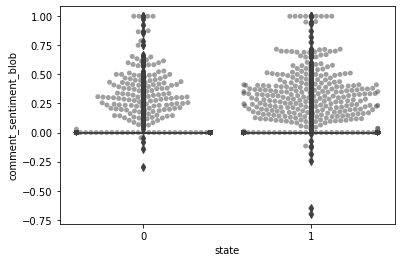

In [176]:
# Visualise the relationship
sns.boxplot(x="state", y="comment_sentiment_blob", data=data_text)
sns.swarmplot(x="state", y="comment_sentiment_blob", data=data_text, color=".25", alpha=0.5)

In [177]:
#### success state has a higher positive sentiment from comments, around 0.2. 
#### Median Sentiment for failed state is 0 cos most of them does not have comment.

In [178]:
# look at why sentiment is extremely low for the success state
pd.set_option('display.max_colwidth', 500)
data_text[data_text["comment_sentiment_blob"] < -0.5]["comments"]

41                                                                                   Chris\nover 5 years ago\nSo how's it coming?\nChris\nover 5 years ago\n"One is the loneliest number that you'll ever do\nTwo can be as bad as one\nIt's the loneliest number since the number one"
620    Corey DonnellCreator\nover 5 years ago\nHello everyone. I'm am very sorry for the delay in getting all the drawings out. I want you all to know that I have not forgotten everyone and do not plan on not completing my work.\nRyan Spilken\nabout 6 years ago\nYeah boyeeeeeeee
Name: comments, dtype: object

In [179]:
pd.reset_option('display.max_colwidth')

### Feature engineering 2: Add sentiment score using Affinn (detect emojis)

In [180]:
#Use affinn score (to detect emoji)
afinn = Afinn(emoticons=True)

afinn_scores = [afinn.score(text) for text in data_text.comments]
data_text['comments_afinn'] = afinn_scores

In [181]:
data_text["comments"][31]

'No comments yet.'

In [182]:
data_text[data_text["comments"] != "No yet ."].loc[:,["comments","comments_afinn"]].head(10)

,comments,comments_afinn
0,AnaTalifi Wall Nazur\nabout 2 years ago\nGood ...,8.0
1,No comments yet.,-1.0
2,Bambi Lewis\nover 7 years ago\nBeautiful snowf...,7.0
3,"paul wheatonCreator\nover 2 years ago\nBen, lo...",139.0
4,No comments yet.,-1.0
5,No comments yet.,-1.0
6,No comments yet.,-1.0
7,No comments yet.,-1.0
8,No comments yet.,-1.0
9,No comments yet.,-1.0


<AxesSubplot:xlabel='state', ylabel='comments_afinn'>

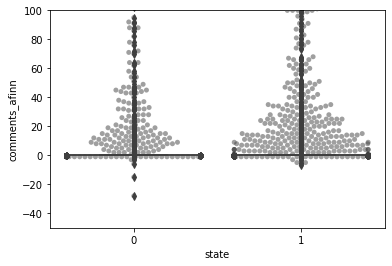

In [183]:
sns.boxplot(x="state", y="comments_afinn", data=data_text).set(ylim=(-50, 100))
sns.swarmplot(x="state", y="comments_afinn", data=data_text, color=".25", alpha=0.5)

In [184]:
#Add affinn to story

afinn_scores = [afinn.score(text) for text in data_text.story]
data_text['story_afinn'] = afinn_scores

In [185]:
#Add affinn to faq_comment

afinn_scores = [afinn.score(text) for text in data_text.faq_comments]
data_text['faq_comments_afinn'] = afinn_scores

In [186]:
#Add affinn to blurb_name

afinn_scores = [afinn.score(text) for text in data_text.blurb_name]
data_text['blurb_name_afinn'] = afinn_scores

In [187]:
#Add affinn to blurb

afinn_scores = [afinn.score(text) for text in data_text.blurb]
data_text['blurb_afinn'] = afinn_scores

In [188]:
#Add affinn to name

afinn_scores = [afinn.score(text) for text in data_text.name]
data_text['name_afinn'] = afinn_scores

In [189]:
data_text.head()

,blurb_name,comments,story,faq,state,faq_comments,blurb,name,comment_sentiment_blob,comments_afinn,story_afinn,faq_comments_afinn,blurb_name_afinn,blurb_afinn,name_afinn
0,With your help we will create this device that...,AnaTalifi Wall Nazur\nabout 2 years ago\nGood ...,Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']AnaTalifi Wall Nazur\nabout 2 years ago...,With your help we will create this device that...,Save water 100% liquid downloads in toilets at...,0.600000,8.0,-10.0,8.0,4.0,2.0,2.0
1,We at Ormiston Primary are looking at starting...,No comments yet.,Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']No comments yet.,We at Ormiston Primary are looking at starting...,Ormiston Primary Community Garden,0.000000,-1.0,-10.0,-1.0,1.0,1.0,0.0
2,Self-taught aspiring metalsmith Looking for he...,Bambi Lewis\nover 7 years ago\nBeautiful snowf...,Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']Bambi Lewis\nover 7 years ago\nBeautifu...,Self-taught aspiring metalsmith Looking for he...,"Aspiring metalsmith in need of better tools, a...",0.406250,7.0,-10.0,7.0,4.0,2.0,2.0
3,So many women believe they are past their prim...,"paul wheatonCreator\nover 2 years ago\nBen, lo...",Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']paul wheatonCreator\nover 2 years ago\n...,So many women believe they are past their prim...,Beauty At Any Age,0.281201,139.0,-10.0,139.0,3.0,0.0,3.0
4,The Horror Zine's Jeani Rector brings us anoth...,No comments yet.,Producto Final\nHi! The funds we will used to ...,[' '],0,[' ']No comments yet.,The Horror Zine's Jeani Rector brings us anoth...,Shrieks and Shivers from the Horror Zine,0.000000,-1.0,-10.0,-1.0,4.0,4.0,0.0


### Add the new sentiment cols to orginal dataset

In [190]:
data["comments_afinn"] = data_text['comments_afinn']
data["story_afinn"] = data_text['story_afinn']
data["faq_comments_afinn"] = data_text['faq_comments_afinn']
data["blurb_name_afinn"] = data_text['blurb_name_afinn']
data["blurb_afinn"] = data_text['blurb_afinn']
data["name_afinn"] = data_text['name_afinn']

In [191]:
pd.set_option('display.max_columns', None)
data.sample(3)

,id_row,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,location_name,month_launched,year_launched,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments,story_afinn,faq_comments_afinn,blurb_name_afinn,blurb_afinn,name_afinn
2377,2383,164,"toob - clean top to bottom - ""push down and tu...","{'id': 28, 'name': 'Product Design', 'slug': '...",20494,US,2020-02-28 15:20:09,USD,2020-06-04 12:00:00,1.0,20000,1716016560,2020-05-02 10:58:37,"{""id"":2389104,""name"":""Damascus"",""slug"":""damasc...",A stainless steel water bottle that opens from...,20494.0,"{""id"":3943649,""project_id"":3943649,""state"":""in...",a-stainless-steel-water-bottle-that-opens-from...,https://www.kickstarter.com/discover/categorie...,True,False,1,2020-06-04 12:00:00,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",20494.0,domestic,,na,0,,0.0,33,Design,Product Design,Damascus,5,2020,0.921028,0.848007,0.958983,0.223504,-0.331095,0,124.963415,0.0,"toob - clean top to bottom - ""push down and tu...",na,0.0,0.0,4.0,4.0,0.0
295,295,1,A project to expose all the amazing musicians ...,"{'id': 44, 'name': 'World Music', 'slug': 'mus...",10,US,2015-06-23 15:22:56,USD,2015-08-23 19:21:46,1.0,1500,1080231048,2015-06-24 19:21:46,"{""id"":353201,""name"":""Colombia"",""slug"":""colombi...",World Sessions: Hear The Unheard,10.0,"{""id"":1977086,""project_id"":1977086,""state"":""in...",world-sessions-hear-the-unheard,https://www.kickstarter.com/discover/categorie...,False,False,0,2015-08-23 19:21:47,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10.0,domestic,"Last year, my friend Bizhan Khodabandeh and I ...",[' '],0,No comments yet.,0.0,60,Music,World Music,Colombia,6,2015,-1.384594,-0.559141,-1.377577,1.788987,-0.331095,0,10.000000,-1.0,A project to expose all the amazing musicians ...,[' ']No comments yet.,8.0,-1.0,3.0,3.0,0.0
1683,1685,6,"Bakersfield Makerspace needs 3D Printers, Scan...","{'id': 362, 'name': 'Makerspaces', 'slug': 'te...",153,US,2014-12-13 16:37:27,USD,2015-02-05 15:24:47,1.0,10000,253820204,2015-01-05 15:24:47,"{""id"":2358492,""name"":""Bakersfield"",""slug"":""bak...",StrataMaker | Bakersfield : People+Tools+Maker...,153.0,"{""id"":1574747,""project_id"":1574747,""state"":""in...",stratamaker-bakersfield-people-tools-makerspac...,https://www.kickstarter.com/discover/categorie...,False,False,0,2015-02-05 15:24:47,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",153.0,international,,na,0,,0.0,31,Technology,Makerspaces,Bakersfield,1,2015,-0.730044,0.471397,-0.558682,0.061135,-0.331095,0,25.500000,0.0,"Bakersfield Makerspace needs 3D Printers, Scan...",na,0.0,0.0,4.0,0.0,4.0


In [192]:
# data.to_csv (r'.\GitHub\BT4222_GrpProject\Output\data_clean&processed_addedsentiment.csv', index = False, header=True)
data.to_csv('Output/data_clean&processed_addedsentiment.csv', index = False, header=True)

# Part 4: Text analysis on comments+faq

In [193]:
#FAQ combined with comments as faq itself is not useful (too many data without any faq)

In [194]:
# define X and y
#X = data_text.faq_comments
X = data_text.comments
y = data_text.state

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.632749
Name: state, dtype: float64

In [195]:
#use default params (CountVect)
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  12113
Training Accuracy:  0.672386895475819
Validation Accuracy:  0.6339181286549708


In [196]:
#After tune
# Tuninng params 1
vect = CountVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7)
tokenize_test(X_train, y_train, X_test, y_test, vect)

print("\nresult better than null")

Features:  7868
Training Accuracy:  0.6669266770670826
Validation Accuracy:  0.6339181286549708

result better than null


### Use NLTK & Lemmatization preprocessing

In [197]:
# To lower case
data_text_nlkt = data_text.copy()
#data_text_nlkt['faq_comments'] = [entry.lower() for entry in data_text_nlkt['faq_comments']]
data_text_nlkt['comments'] = [entry.lower() for entry in data_text_nlkt['comments']]

# Tokenise
#data_text_nlkt['faq_comments']= [word_tokenize(entry) for entry in data_text_nlkt['faq_comments']]
data_text_nlkt['comments']= [word_tokenize(entry) for entry in data_text_nlkt['comments']]

#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

#for index,entry in enumerate(data_text_nlkt['faq_comments']):
for index,entry in enumerate(data_text_nlkt['comments']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [198]:
data_text_nlkt['text_final'][42]

"['comment', 'yet']"

In [199]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=42)

In [200]:
#use CountVect
vect = CountVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7)
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  7270
Training Accuracy:  0.6669266770670826
Validation Accuracy:  0.6350877192982456


In [201]:
#Use TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7, norm="l2")
tokenize_test(X_train, y_train, X_test, y_test, vect)

print("\nTF-IDF score is slightly better in validation")

Features:  7270
Training Accuracy:  0.6302652106084243
Validation Accuracy:  0.632748538011696

TF-IDF score is slightly better in validation


In [83]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words='english', max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
176,ago,1.095888
8471,year,1.075695
8472,year ago,1.074375
4913,month,1.048331
4914,month ago,1.048306
5638,pledge,1.020163
7878,update,1.017919
7405,thank,1.017313
7472,thanks,1.017083
4518,love,1.014385


In [84]:
#Add own stop words

from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["ago","year","month"])

In [86]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words=my_stop_words, max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4824,pledge,1.023186
7024,update,1.022108
6558,thank,1.020661
6624,thanks,1.020508
3892,love,1.017375
1250,congratulation,1.016330
5370,receive,1.016146
3818,look,1.015238
2680,great,1.015022
672,book,1.014875


In [ ]:
#Important to address pledge and update about the project
#thanks/love/congratulation/receive are probably confounded with successful fund raised, hence thanking the backers

In [88]:
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, stop_words=my_stop_words, max_df=0.7, norm='l2')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

print("Top Tokens in faq_comment that leads to failure")

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

Top Tokens in faq_comment that leads to failure


,token,ratio
1156,comment,1.380548
6744,thu nov,1.002785
1755,dream,1.002533
676,book author,1.002509
6110,smash,1.002500
256,angie,1.002479
6864,torres,1.002387
6659,thanks late,1.002373
1467,danny,1.002317
2867,hector,1.002301


In [ ]:
#Not useful as ratio is low (comment ratio is high due to 'No comment')